In [1]:
import requests 
import numpy as np 
from bs4 import BeautifulSoup  
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
r=requests.get('https://ororo.tv/es')

In [3]:
# Como no fue posible extraer la informacion de esta manera, creamos un archivo csv

In [4]:
df=pd.read_csv('information_movies.dat',sep='},') 

/home/alexbonella2806/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
df.columns[59].split(',')[0].split(':')[1] # Id de la serie

'580'

In [6]:
df.columns[59].split(',')[1].split(':')[1].replace('"',"") # Titulo de la serie

'Doctor Foster'

In [7]:
df.columns[59].split(',')[2].split(':')[1].replace('"',"") # Genero de la serie

'Drama'

In [8]:
df.columns[59].split('year')[1].split(',')[0].split(':')[1].replace('"',"") # Año de estreno

'2015'

In [9]:
df.columns[59].split('imdb')[1].split(',')[0].split(':')[1] # Rating serie 

'7.9'

In [10]:
df.columns[59].split('desc')[1].split('"')[2] # Descripcion de la serie 

'A woman suspects her husband of having an affair. After following several lines of enquiries far more unravels including a streak of violence below the surface.\\r\\n'

In [11]:
# Creamos las listas para los DataFrames

In [12]:
ID_serie=[]
Title_serie=[]
Gender_serie=[]
Rating=[]
Year=[]
Desc=[]
for i in range(60):
    ID_serie.append(df.columns[i].split(',')[0].split(':')[1])
    Title_serie.append(df.columns[i].split(',')[1].split(':')[1].replace('"',""))
    Gender_serie.append(df.columns[i].split('translated')[1].split(':')[1].split(',')[0].replace('"',""))
    Year.append(df.columns[i].split('year')[1].split(',')[0].split(':')[1].replace('"',""))
    Rating.append(df.columns[i].split('imdb')[1].split(',')[0].split(':')[1])
    Desc.append(df.columns[i].split('desc')[1].split('"')[2])

In [13]:
# Eliminamos los caracteres especiales de genero como "Animaci\u00f3n " y "Biograf\u00eda" 

In [14]:
Gender_edit=[]
for i in range(60):
    Gender_edit.append(Gender_serie[i].replace('\\u00f3', 'ó'))
    
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------

Gender_edit2=[]
for i in range (60):
    Gender_edit2.append(Gender_edit[i].replace('\\u00ed', 'í'))

In [15]:
# Creamos nuestro DataFrame para hacer las consultas respectivas 

In [16]:
data={'ID_serie':ID_serie,'Title_serie':Title_serie,'Gender_serie':Gender_edit2,'Year':Year,'Rating':Rating,'Desc':Desc}

In [17]:
movies=pd.DataFrame(data)

In [18]:
movies.sort_values(by='Rating',ascending=False).head(10) # Top 10 mejores series 

,ID_serie,Title_serie,Gender_serie,Year,Rating,Desc
44,1241,Blue Planet II,Documental,2017,9.9,Sir David Attenborough returns to the ocean wa...
21,453,Rick and Morty,Animación,2013,9.3,An animated series that follows the exploits o...
10,1247,Marvels The punisher,Acción,2017,9.3,"After the murder of his family, Marine veteran..."
29,910,Stranger Things,Drama,2016,9.0,"When a young boy disappears, his mother must c..."
30,991,The Crown,Drama,2016,8.9,The Crown focuses on Queen Elizabeth II as a 2...
2,944,This Is Us,Comedia,2016,8.9,"A group of people born on the same day, includ..."
37,578,Narcos,Crimen,2015,8.9,A chronicled look at the criminal exploits of ...
9,28,Black Mirror,Drama,2011,8.9,If technology is a drug \u2013 and it does fee...
28,1096,13 Reasons Why,Drama,2017,8.9,"Follows teenager Clay Jensen, in his quest to ..."
41,1231,Mindhunter,Crimen,2017,8.8,An agent in the FBI's Elite Serial Crime Unit ...


In [19]:
movies.sort_values(by='Rating',ascending=False).tail(10) # Top 10 series con menos puntuación 

,ID_serie,Title_serie,Gender_serie,Year,Rating,Desc
54,1201,Liar,Drama,2017,7.1,LIAR is a 21st-century take on modern-day gend...
1,1215,Young Sheldon,Comedia,2017,7.0,"The early life of child genius Sheldon, later ..."
42,1161,Salvation,Drama,2017,6.9,An MIT grad student and a tech superstar bring...
34,786,Girlfriends' Guide to Divorce,Comedia,2014,6.9,Follows a best-selling author of a self-help b...
8,1212,Star Trek,Ciencia ficción,2017,6.8,"Ten years before Kirk, Spock and the Enterpris..."
24,943,Bull,Drama,2016,6.6,BULL stars Michael Weatherly as Dr. Jason Bull...
53,1276,Britannia,Drama,2018,6.6,An epic drama set in 43AD as the Roman Imperia...
17,986,Man with a Plan,Comedia,2016,6.4,A dad finds out that parenting is harder than ...
20,1230,Dynasty,Drama,2017,6.0,Follows two of America's wealthiest families a...
57,1208,Marvels Inhumans,Acción,2017,5.2,An isolated community of superhumans fight to ...


In [20]:
movies['Gender_serie'].value_counts()

Drama              19
Comedia            17
Crimen              7
Acción              5
Animación           4
Aventura            2
Biografía           2
Ciencia ficción     2
Documental          1
Suspense            1
Name: Gender_serie, dtype: int64

In [21]:
Count_By_Gender=pd.DataFrame(movies['Gender_serie'].value_counts())

In [22]:
Count_By_Gender.columns

Index(['Gender_serie'], dtype='object')

In [23]:
Count_By_Gender.index

Index(['Drama', 'Comedia', 'Crimen', 'Acción', 'Animación', 'Aventura',
       'Biografía', 'Ciencia ficción', 'Documental', 'Suspense'],
      dtype='object')

In [24]:
# Series por Genero

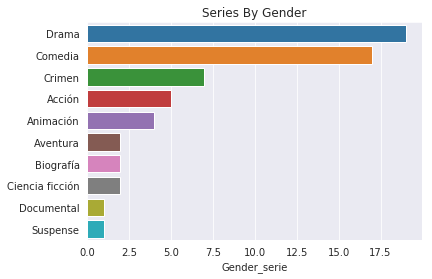

In [25]:
sns.set_style(style='darkgrid')
plt.title('Series By Gender')
sns.barplot(x=Count_By_Gender['Gender_serie'],y=Count_By_Gender.index)

In [26]:
# Genero que mas le gusta a los  usuarios de Ororo.TV

In [27]:
rating_num=[]
for i in range(60):
    rating_num.append(float(movies['Rating'][i]))

In [28]:
movies['Rating']=rating_num

In [29]:
test=movies[['Gender_serie','Rating']].groupby(by='Gender_serie').mean()
Rating_Avg_ByGender=test.reset_index(inplace=False)
Rating_Avg_ByGender=Rating_Avg_ByGender.sort_values(by='Rating',ascending=False)
Rating_Avg_ByGender

,Gender_serie,Rating
7,Documental,9.900000
1,Animación,8.625000
3,Biografía,8.400000
6,Crimen,8.171429
9,Suspense,7.900000
8,Drama,7.842105
5,Comedia,7.711765
2,Aventura,7.550000
0,Acción,7.340000
4,Ciencia ficción,7.250000


In [30]:
#  Genero con mejor calificación

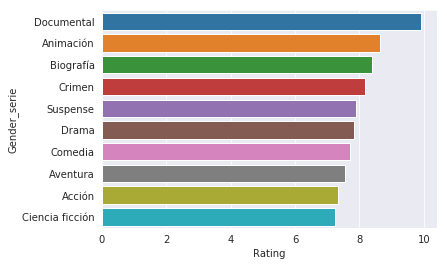

In [31]:
sns.barplot(x=Rating_Avg_ByGender['Rating'],y=Rating_Avg_ByGender['Gender_serie'])

# **FINAL.......**